**Прогноз оттока клиентов для оператора связи "Ниединогоразрыва.ком"**

Проведите исследовательский анализ данных. В конце Jupyter Notebook напишите: Список уточняющих вопросов. Примерный план решения задачи. Пропишите 3–5 основных шагов, каждый поясните не более двумя предложениями.

**Вводные данные**

**Описание проекта**
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Описание услуг**

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.


**Критерии оценки**

Чтобы выполнить финальный спринт успешно, нужно набрать пять очков, или story points (sp). Это условные единицы для измерения сложности задачи. Вы получите:
от 4 до 6 sp за основной проект;
1 sp за дополнительную задачу. 

Изходя из выше перечисленного можно выделить следующие цели и задачи.

**Цель проекта**

Построить модель машинного обучения для предсказания оттока клиентов.

**Задачи проекта**

Изучить датасет: есть ли в нем отсутствующие признаки, пропущенные значения, дубликаты, выбросы, какого распределение признаков. 
Построить графики распределения признаков.
Построить матрицу корреляций и отобразить её.
Построить модель прогнозирования оттока клиентов.

**План работ:**

1. [Загрузить необходимые библиотеки, открыть файлы](#старт)

2. [Изучение данных:](#вид)
        - посмотреть основную информацию по предоставленным данным: количество столбцов, объектов, 
        - проверить имеются ли пропущенные значения, 
        - проверить имеются ли дубликаты, 
        - определить количество уникальных значений для некоторых данных,
        - выянить нужна ли замена типа данных и переименование столбцов, 
        - можно ли уменьшить объем занимаемой памяти
        
      2.1.[Вывод](#вывод_2.1)

3.[ Объединение таблиц по столбцу customerID](#плюс)

4. [Предобработка данных. Выполнить необходимый объем работ по итогам пункта 2 и 3: ](#предобработка)
        - замена типа данных,
        - удаление дубликатов,
        - заполнение пропущенных значений,
        - найдем и исправим ошибки в данных, если они есть.

5. [Исследовательский анализ данных: ](#анализ)
        - определить редкие и выбивающиеся значения. 
        - описать распределение.
        - исследовать баланс классов.
        - кодирование по необходимости (OE vs OHE).
        - определить корреляцию.
        
      5.1.[Вывод](#вывод_5.1)

6. [Анализ и подготовка данных к работе с моделями:](# данные)
        - разделение на признаки и целевой признак.
        - разделение объема данных на обучающую и тестовую выборки.
        - кодирование признаков.
        - масштабирование признаков.
        - выбор параметров

7. [Подбор гиперпараметров.](#параметр)
        - RandomForestClassifier
        - CatBoostClassifier

8. [Тестирование моделей](#тест)

9. [Вывод](#вывод)

10. [Чек-лист](#лист)

## Загрузка библиотек и данных
<a id="старт"></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV# импортируем GridSearchCV из библиотеки sklearn
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [3]:
df_contr = pd.read_csv('/datasets/final_provider/contract.csv')
df_pers = pd.read_csv('/datasets/final_provider/personal.csv')
df_int = pd.read_csv('/datasets/final_provider/internet.csv')
df_ph = pd.read_csv('/datasets/final_provider/phone.csv')

##  Изучение данных
<a id="вид"></a>

In [4]:
def df_info(df):
    
    display(df.head())
    display(df.info())
    display(df.describe())
    display(print('Количество дубликатов:', df.duplicated().sum()))
    display(print('Количество уникальных значений:'))
    display(df.nunique())

In [5]:
df_info(df_contr)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Количество дубликатов: 0


None

Количество уникальных значений:


None

customerID          7043
BeginDate             77
EndDate                5
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
dtype: int64

In [6]:
df_info(df_pers)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Количество дубликатов: 0


None

Количество уникальных значений:


None

customerID       7043
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
dtype: int64

In [7]:
df_info(df_int)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,8550-XSXUQ,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Количество дубликатов: 0


None

Количество уникальных значений:


None

customerID          5517
InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
dtype: int64

In [8]:
df_info(df_ph)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5931-FLJJF,No
freq,1,3390


Количество дубликатов: 0


None

Количество уникальных значений:


None

customerID       6361
MultipleLines       2
dtype: int64

### Вывод
<a id="вывод_2.1"></a>

Всего 4 датафрейма:
*	Таблица df_contr (информация о договоре): customerID — уникальный идентификатор пользователя, BeginDate — дата начала, EndDate — дата окончания, Type — тип, PaperlessBilling — безбумажный биллинг, PaymentMethod — способ оплаты, MonthlyCharges — ежемесячные платежия, TotalCharges — общие расходы		
Размер таблицы: 8 столбцов (4 из них — качественные,  2 — количественные и 2 — временные) , 7043 объектов. Тип данных представлен:  float64(1), object(7).

*	Таблица df_pers (персональные данные клиента): customerID — уникальный идентификатор пользователя,	gender - пол, 	SeniorCitizen - пенсионер, 	Partner	 - супруг(а),  Dependents - дети
Размер таблицы: 5 столбцов (4 из них — качественные,  1 — количественные) , 7043 объектов. Тип данных представлен: int64(1), object(4).

*	Таблица df_int (информация об интернет-услугах): customerID - уникальный идентификатор пользователя, InternetService - интернет сервис,	OnlineSecurity - блокировка небезопасных сайтов , OnlineBackup - облачное хранилище файлов для резервного копирования данных, DeviceProtection - антивирус, TechSupport - выделенная линия технической поддержки, StreamingTV - стриминговое телевидение, StreamingMovies - каталог фильмов
Размер таблицы: 8 столбцов (8 из них — качественные) , 5516 объектов. Тип данных представлен: object(8).

*	Таблица df_ph (информация об услугах телефонии): customerID — уникальный идентификатор пользователя, MultipleLines - многоканальная связь
Размер таблицы: 2 столбцов  (2 из них — качественные), 6361 объектов. Тип данных представлен: object(2).

Датафреймы: df_contr, df_pers, df_int, df_ph не содержат пропусков и дубликатов. Количество объектов в таблицах df_contr и df_pers, в остальных датафреймах меньше. В таблице df_contr вместо даты в столбце EndDate записано No, это связано с тем, что на данный момент клиент продолжает оставаться пользователем оператора связи «Ниединогоразрыва.ком».

Присутствуют столбцы тип данных которых надо менять на другой тип: нужно менять типы данных в датах, monthly_charges, total_charges на  вещественный тип, senior_citizen на object для единообразия с остальными столбцами.

Выбросов и анамалий не выявлено.

Провести объединение таблиц по столбцу customerID.

## Объединение таблиц
<a id="плюс"></a>

Объединение таблиц  df_contr, df_pers, df_int и df_ph в одну df_all

In [9]:
df_all =df_contr.merge(df_pers, on='customerID')\
.merge(df_ph, how='left', on='customerID')\
.merge(df_int, how='left', on='customerID')

In [10]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       6361 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 1.1+ MB


## Предобработка данных
<a id="предобратотка"></a>

* Замена наименований столбцов

In [11]:
df_all.rename(columns={'customerID': 'customer_id', 'BeginDate': 'begin_date', 'EndDate': 'end_date', 'Type': 'type', 'PaperlessBilling': 'paperless_billing',
                    'PaymentMethod': 'payment_method', 'MonthlyCharges': 'monthly_charges', 'TotalCharges': 'total_charges', 
                    'SeniorCitizen': 'senior_citizen', 'Partner': 'partner', 'Dependents': 'dependents', 'MultipleLines': 'multiple_lines',
                    'InternetService': 'internet_service', 'OnlineSecurity': 'online_security', 'OnlineBackup': 'online_backup',
                    'DeviceProtection': 'device_protection', 'TechSupport': 'tech_support', 'StreamingTV': 'streaming_tv', 'StreamingMovies': 'streaming_movies'}, inplace=True)


Сформируем новый стобец - целевой признак и заполним его на основании данных end_date: если в end_date значится No, то запишим - 0 (значит клиент не ушел), если в end_date значится дата, то запишим - 1 (значит клиент  ушел).

In [12]:
df_all['churn'] = np.where(df_all['end_date'] == 'No', 0, 1)
df_all['senior_citizen'] = np.where(df_all['senior_citizen'] == 0, 'No', 'Yes')

In [13]:
df_info(df_all)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,No,...,No,NaN,DSL,No,Yes,No,No,No,No,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,No,...,No,No,DSL,Yes,No,Yes,No,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,No,...,No,No,DSL,Yes,Yes,No,No,No,No,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,No,...,No,NaN,DSL,Yes,No,Yes,Yes,No,No,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,No,...,No,No,Fiber optic,No,No,No,No,No,No,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customer_id          7043 non-null object
begin_date           7043 non-null object
end_date             7043 non-null object
type                 7043 non-null object
paperless_billing    7043 non-null object
payment_method       7043 non-null object
monthly_charges      7043 non-null float64
total_charges        7043 non-null object
gender               7043 non-null object
senior_citizen       7043 non-null object
partner              7043 non-null object
dependents           7043 non-null object
multiple_lines       6361 non-null object
internet_service     5517 non-null object
online_security      5517 non-null object
online_backup        5517 non-null object
device_protection    5517 non-null object
tech_support         5517 non-null object
streaming_tv         5517 non-null object
streaming_movies     5517 non-null object
churn                7043 non-null int64
dtypes: flo

None

,monthly_charges,churn
count,7043.000000,7043.000000
mean,64.761692,0.265370
std,30.090047,0.441561
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,1.000000
max,118.750000,1.000000


Количество дубликатов: 0


None

Количество уникальных значений:


None

customer_id          7043
begin_date             77
end_date                5
type                    3
paperless_billing       2
payment_method          4
monthly_charges      1585
total_charges        6531
gender                  2
senior_citizen          2
partner                 2
dependents              2
multiple_lines          2
internet_service        2
online_security         2
online_backup           2
device_protection       2
tech_support            2
streaming_tv            2
streaming_movies        2
churn                   2
dtype: int64

После объединения таблиц появились пропущенные значения в df_all, т.к. изначально количество объектов в df_contr и в df_pers не совпадало с количество объектов в df_int и df_ph.

* Обработка  пропусков, заполним пропущенные значения меткой - not_have

In [14]:
df_all = df_all.fillna('not_have')

Заменим в столбце end_date отсутствующие даты, которые обозначены No, на 2020-02-01, для того чтобы в дальнейшем было заменить тип в данном столбце.

In [15]:
df_all['end_date'] = df_all['end_date'].apply(lambda x: '2020-02-01' if x == 'No' else x.split(' ')[0])

In [16]:
df_all['begin_date'] = pd.to_datetime(df_all['begin_date'])
df_all['end_date'] = pd.to_datetime(df_all['end_date'])

Создадим еще один столбец, в котором посчитаем количество месяцев, которые клиент оставался с оператором связи.

In [17]:
df_all['sum_month'] = ((df_all['end_date'] - df_all['begin_date'])/np.timedelta64(1, 'M')).astype(int)

Найдем клиентов, которые только что пришли и остались.

In [18]:
print('Количество новых клиентов:', df_all.query('sum_month == 0 & churn == 0')['sum_month'].count())

Количество новых клиентов: 11


In [19]:
df_all.query('sum_month == 0 & churn == 0')

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn,sum_month
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,Female,No,...,not_have,DSL,Yes,No,Yes,Yes,Yes,No,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,Male,No,...,No,not_have,not_have,not_have,not_have,not_have,not_have,not_have,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,Female,No,...,No,DSL,Yes,Yes,Yes,No,Yes,Yes,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,Male,No,...,Yes,not_have,not_have,not_have,not_have,not_have,not_have,not_have,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,Female,No,...,not_have,DSL,Yes,Yes,Yes,Yes,Yes,No,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,Male,No,...,No,not_have,not_have,not_have,not_have,not_have,not_have,not_have,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,Male,No,...,Yes,not_have,not_have,not_have,not_have,not_have,not_have,not_have,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,Female,No,...,No,not_have,not_have,not_have,not_have,not_have,not_have,not_have,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,Male,No,...,No,not_have,not_have,not_have,not_have,not_have,not_have,not_have,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,Female,No,...,Yes,DSL,No,Yes,Yes,Yes,Yes,No,0,0


У данных клиентов отсутстуют данные в total_charges, т.к. они оформились на момент выгрузки данных, можно было бы заполнить данную графу используя тариф умноженный на стоимость оплаты в месяц. Но так как вычисление таким способом не соответствует представленным данным в столбце total_charges, то принимаю решение удалить эти 11 записей.

In [20]:
df_all =df_all.drop(df_all.query('sum_month == 0 & churn == 0').index)

Сделаем копии датасета для дальнейшей работы

In [21]:
df_all_cat=df_all.copy()

In [22]:
df_all_study=df_all.copy()

* Проведем замену типа данных и разделим по категориям

In [23]:
df_all_study['total_charges'] = pd.to_numeric(df_all_study['total_charges'], errors='coerce')

In [24]:
df_all_study = df_all_study.astype({"monthly_charges":'float32', "total_charges":'float32', 
                        "churn":'int8',  "sum_month":'int8'})
numeric_columns = df_all_study.select_dtypes(include=['float32','int8']).columns

In [25]:
category_columns = df_all_study.iloc[:,3:-1].select_dtypes(include=['object']).columns
df_all_study[category_columns] = df_all_study[category_columns].astype('category')

## Исследовательский анализ данных
<a id="анализ"></a>

* Построим графики для численных и категориальных переменных

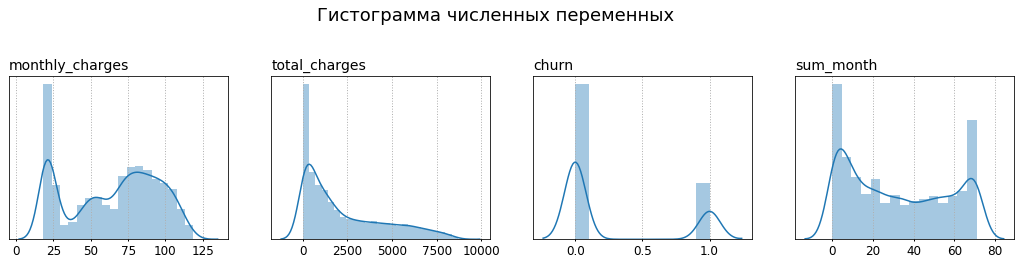

In [26]:
fig = plt.figure(figsize=(18,3))
fig.suptitle(f'Гистограмма численных переменных', x=.5, y=1.2, fontsize=18)
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(1,len(numeric_columns),i)
    sns.distplot(df_all_study[col])#, orient='h', notch=True)
    plt.grid(True, linestyle=':', linewidth=1)
    plt.yticks([])
    plt.ylabel('')
    plt.xlabel('')
    plt.tick_params(direction='out', length=2, labelsize=12, width=1)
    plt.title(f'{col}', fontsize=14, ha='left', position=(0,1))

Видим что данные распределены неравномерно. Наблюдается дисбаланс классов.

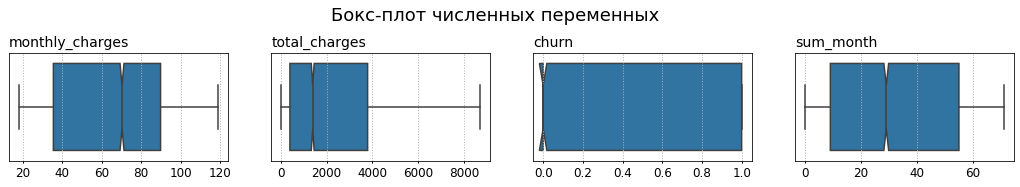

In [27]:
fig = plt.figure(figsize=(18,2))
fig.suptitle(f'Бокс-плот численных переменных', x=.5, y=1.2, fontsize=18)
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(1,len(numeric_columns),i)
    sns.boxplot(df_all_study[col], orient='h', notch=True)
    plt.grid(True, linestyle=':', linewidth=1)
    plt.yticks([])
    plt.ylabel('')
    plt.xlabel('')
    plt.tick_params(direction='out', length=2, labelsize=12, width=1)
    plt.title(f'{col}', fontsize=14, ha='left', position=(0,1))

Для monthly_charges, total_charges, churn и sum_month выбросы отсутствуют, медиана не совпадает со средним значением.

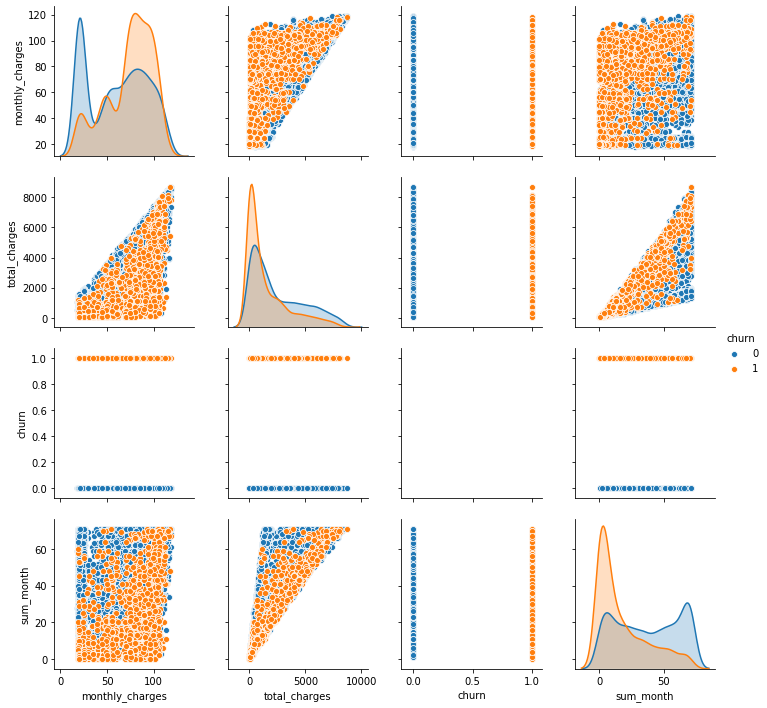

In [28]:
sns.pairplot(df_all_study, hue='churn')

Из графика видно, что total_charges для ушедших и ставшихся имеет похожее разпределение. Для оттока наблюдается выше максимум по сравнению с оставшимися в первые месяцы. Так же в первые месяцы наблюдаем максимум покинувших оператора связи пользователей.

Построим распределение категориальных признаков для клиентов  и ушедших от оператора связи

In [29]:
df_new = df_all_study.query('churn == 1')

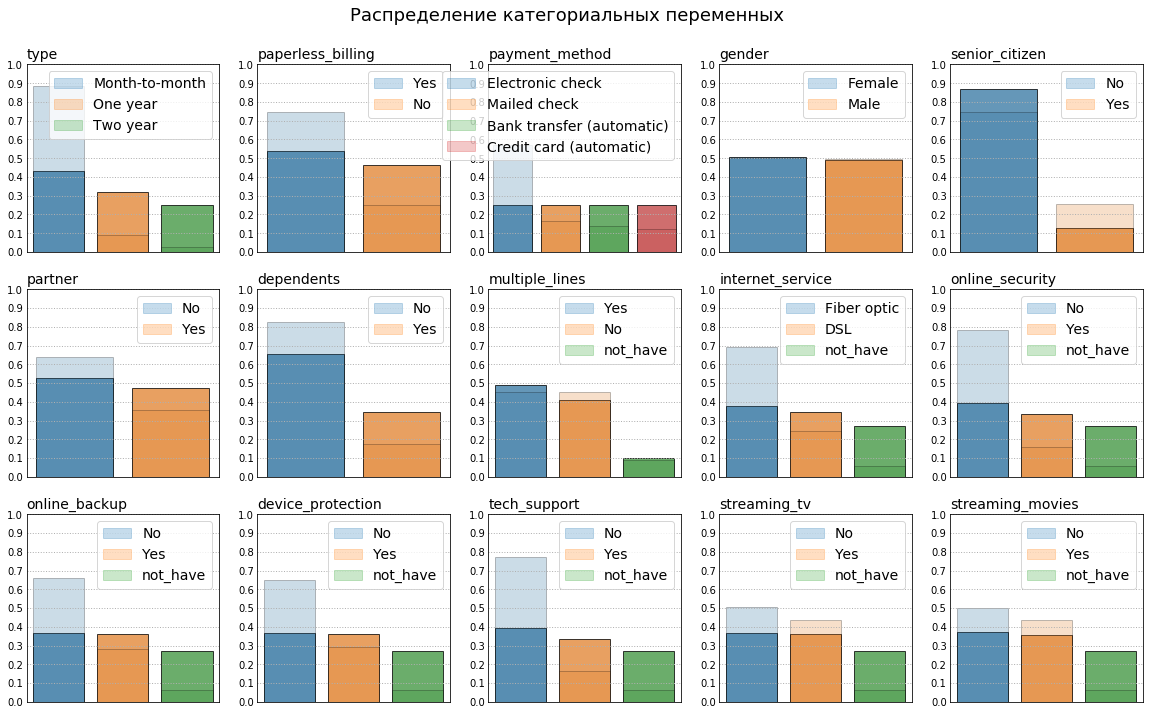

In [30]:
fig = plt.figure(figsize=(20,20))
fig.suptitle(f'Распределение категориальных переменных', x=.5, y=0.92, fontsize=18)#
for i, col in enumerate(category_columns, start=1):
    x = df_all_study.query('churn == 0')[col].value_counts(normalize=True).index
    y = df_all_study.query('churn == 0')[col].value_counts(normalize=True)
    c_list = list(sns.color_palette())[:len(x)]
    c_patch = []
    for c in c_list:
        c_patch.append(mpatches.Patch(color=c, alpha=0.75, linewidth=1, edgecolor='black'))
    plt.subplot(len(category_columns) // 3, len(category_columns) // 3, i)
    sns.barplot(x=x, y=y, order=x, alpha=0.75, linewidth=1, edgecolor='black')
    

for i, col in enumerate(category_columns, start=1):
    x = df_new[col].value_counts(normalize=True).index
    y = df_new[col].value_counts(normalize=True)
    c_list = list(sns.color_palette())[:len(x)]
    c_patch = []
    for c in c_list:
        c_patch.append(mpatches.Patch(color=c, alpha=0.25, linewidth=1, edgecolor='black'))
    plt.subplot(len(category_columns) // 3, len(category_columns) // 3, i)
    sns.barplot(x=x, y=y, order=x, alpha=0.25, linewidth=1, edgecolor='black')
    plt.legend(handles=c_patch, labels=x.to_list(), fontsize=14)
    plt.grid(True, axis='y', linestyle=':', linewidth=1)
    plt.tick_params(axis='y', direction='out', length=0, width=1)
    plt.ylabel('')
    plt.yticks(np.arange(0.00, 1.01, step=0.10), fontsize=10)
    plt.xticks([])
    plt.title(f'{col}', fontsize=14, ha='left', position=(0,1))    


Пользователи, которые остались:
- применно имеют равномерное распределение по типу оплаты, с небольшим перевесом лидирует Month-to-month,
- немногим больше предпочитают получать бумажные счета оплаты,
- одинаково пользуются разными методами оплаты,
- мужчины и женщины пользуются услугами связи практически в раных пропорциях,
- большое количество пенсионеров,
- немногих больше перевес в сторону неженатого человека,
- две трети не имеют детей,
- чаще пользуются параллельными линиями во время звонка,
- интерет сервисом, блокировка небезопасных сайтов, блачное хранилище файлов для резервного копирования, данных, антивирус,  выделенная линия технической поддержки, стриминговое телевидение,  каталог фильмов данными услугами пользуются 50 / 50 из имеющихся данных.

Посмотрим как изменяются категориальные признаки взависимости от длительности пользования услугами связи для клиентов оставшихся и ушедших от оператора связи

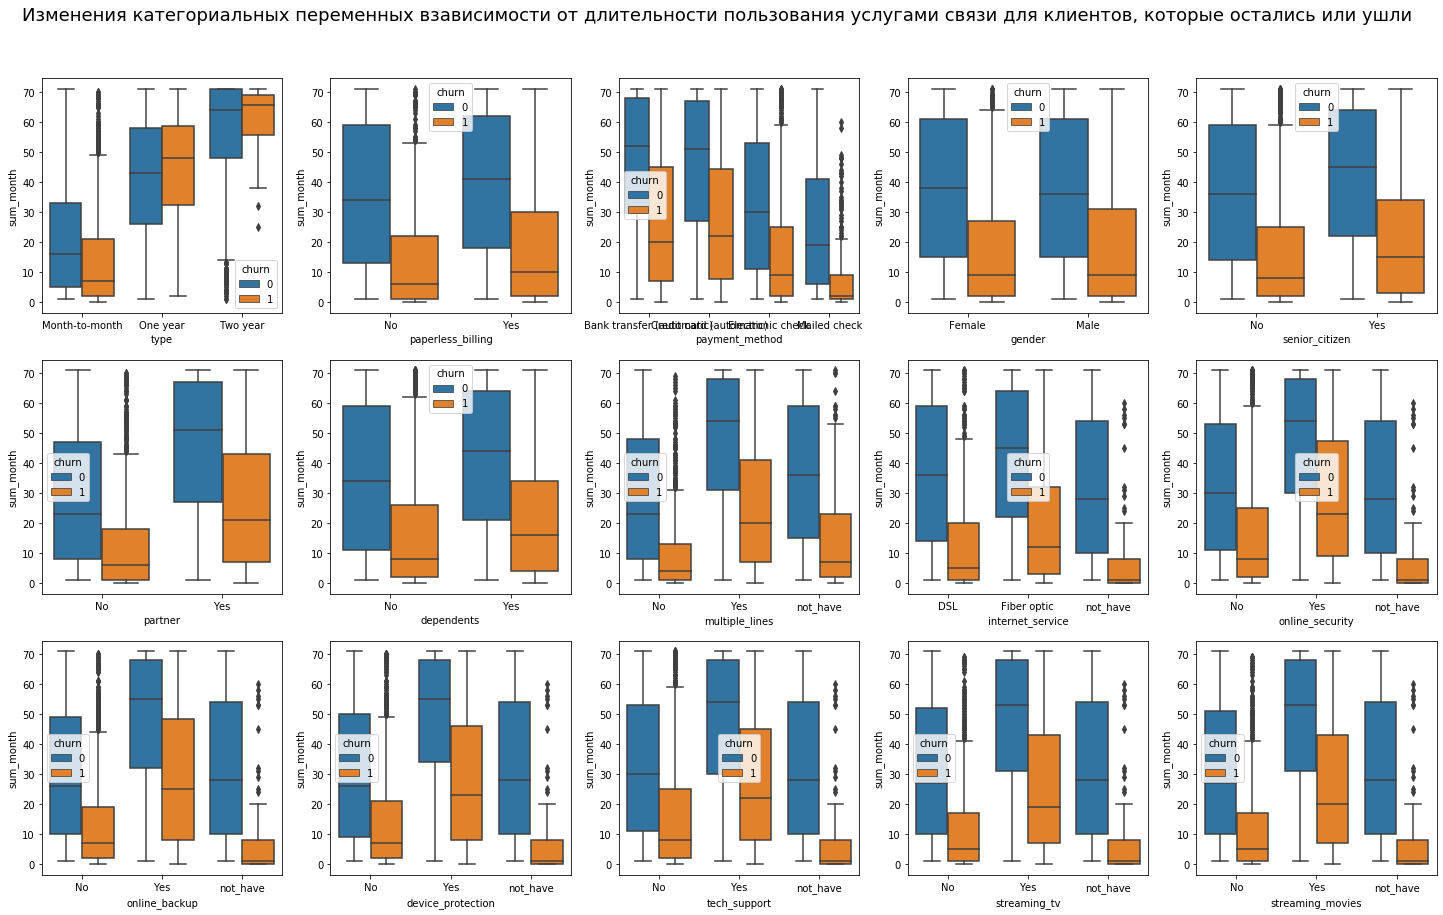

In [31]:
fig = plt.figure(figsize=(25,25))
fig.suptitle(f'Изменения категориальных переменных взависимости от длительности пользования услугами связи для клиентов, которые остались или ушли', x=.5, y=0.92, fontsize=18)#
for i, col in enumerate(category_columns, start=1):
    x = df_all_study[col]
    y = df_all_study['sum_month']
    plt.subplot(len(category_columns) // 3, len(category_columns) // 3, i)
    sns.boxplot(x=x, y=y, hue=df_all_study['churn'])#, dodge=False)

Пользователь, который ушел от оператора связи:
- чаще всего пользуется  типом оплаты - Month-to-month, почти в три раза чаще чем One year и Two year,
- в два раза больше предпочитают получать бумажные счета оплаты,
- методами оплаты чаще используют Electronic chek,
- мужчины и женщины пользуются услугами связи практически в раных пропорциях,
- большое количество пенсионеров,
- неженатый человек встречается в 1,5 раза чаще, чем женатый,
- трети четверти не имеют детей,
- параллельными линиями во время звонка пользуются в соотношениях 50 /50,
- интерет сервисом, блокировкой небезопасных сайтов, облачным хранилищем файлов для резервного копирования, данных, антивирус,  выделенная линия технической поддержки, стриминговое телевидение,  каталог фильмов данными услугами пользуются 50 / 50 из имеющихся данных.

Построим диаграмму корреляции для количественных признаков

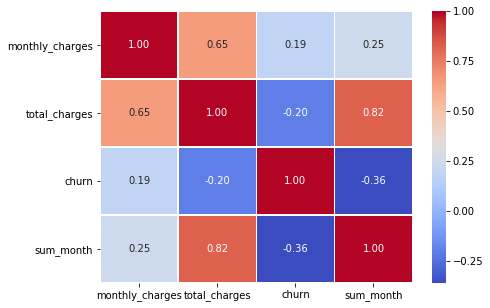

In [32]:
corr = df_all_study.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot = True, fmt = '0.2f', linewidths=.5, cmap="coolwarm")
plt.show()

### Вывод
<a id="вывод_5.1"></a>

Была проведена предобработка данных: 
* четыре таблицы были объединены в одну, 
* проведена заменена типа данных, 
* выявлена и устранена аномалия в столбце total_charges, 
* выбросов не обнаружено, 
* определено, что численные данные распределены не нормально, за исключением данных total_charges. Данные total_charges распределены нормально во смещение вправо, как для клиентов оставшихся, так и для клиентов ушедших. Такое же распределение со смещением вправо имеют данные sum_month для клиентов отказавшихся от услуг оператора.

Как видно из графиков отток клиентов происходит первые два месяца, после чего количество уходов резко снижается. При этом клиента, который ушел от оператора связи, 
можно охарактиризовать следующим образом:

 |   Наименование      |       Значение       |
 | ------------------ |------------|
 |   Type      |Month-to-month |
   |   PaperlessBilling      |Yes |
 |   PaymentMethod      |Electronic chek |
 |   Partner      | No |
  |   Dependents      | No|
   |   InternetService      |Fiber optic |
 |   OnlineSecurity      | No |
 |   OnlineBackup      | No |
  |   DeviceProtection      | No |
 |   TechSupport      | No |
  |   StreamingTV      | No |
 |   StreamingMovies      | No |
 
Выявлена положительная корреляция между длительностью подписания контракта и суммарной выручкой, а также отрицательная между оттоком клиентов и суммарной выручкой, и длительностью подписания контракта. 

Также можно добавить, что чем дольше пользователь пользуется услугами и чем меньше он тратит в первые месяцы, тем дольше он будет оставаться  в качестве клиента.

Выявлен дисбаланс классов.

|   Остался    |       Ушел       |
 | ------------------ |------------|
 |   5174      |1869 |
 
 Целевой признак - churn.

## Анализ и подготовка данных к работе с моделями: 
<a id="данные"></a>

Проведем подбор модели для решения данной задачи.
Рассмотрим две модели: RandomForestClassifier и CatBoostClassifier. Почему выбор остановился на этих моделях? Потому что для решения задачи классификации они подходят лучше всего, и для того, что бы показать разнообразный подход для решения задачи.

Чтобы воспользоваться моделью RandomForestClassifier данные необходимо:
* закодировать (уйти от категориальных переменных)
* привести к одному масштабу
* подобрать гиперпараметры

In [33]:
df_all_study = df_all_study.drop([ 'customer_id', 'begin_date', 'end_date'], axis=1)

Данные содержат категориальные признаки, проведем быстрое кодирование (One-Hot encoding) воспользовавшись функцией pd.get_dummies() с аргументом drop_first, чтобы не попасть в дамми-ловушку, и переведем категориальные признаки в численные.

In [34]:
df_dummi=pd.get_dummies(df_all_study, drop_first=True)

In [35]:
X = df_dummi.drop(['churn'], axis=1)
y = df_dummi['churn']

In [36]:
features_train, features_test, target_train, target_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=42,
                                                    stratify=y)

In [37]:
print('Размер обучающей выборки:', features_train.shape)
print('Размер целевого признака обучающей выборки:', target_train.shape )
print('Размер тестирующей выборки:', features_test.shape)
print('Размер целевого признака тестирующей выборки:', target_test.shape)

Размер обучающей выборки: (5625, 29)
Размер целевого признака обучающей выборки: (5625,)
Размер тестирующей выборки: (1407, 29)
Размер целевого признака тестирующей выборки: (1407,)


В данных есть столбцы: monthly_charges,	total_charges и	sum_month с различными значениями и их разбросами. Например, максимальное значение  total_charges - 8684.79, в тоже время, например, у gender_Male и streaming_tv_Yes - 1. Алгоритм автоматически решит, что monthly_charges,	total_charges и	sum_month признаки важнее, чем остальные. А это не так: все признаки значимы. Чтобы избежать этой ловушки, признаки масштабируются — приводятся к одному масштабу. Поэтому применим один из методов масштабирования — стандартизации данных.

In [38]:
scaler = MinMaxScaler()
numeric = ['monthly_charges', 'total_charges', 'sum_month']

scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])#преобразуем обучающую выборку функцией transform()
features_test[numeric] = scaler.transform(features_test[numeric])#преобразуем тестовую выборку функцией transform()
features_train#посмотрим на результат

,monthly_charges,total_charges,sum_month,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,...,online_backup_Yes,online_backup_not_have,device_protection_Yes,device_protection_not_have,tech_support_Yes,tech_support_not_have,streaming_tv_Yes,streaming_tv_not_have,streaming_movies_Yes,streaming_movies_not_have
1413,0.759601,0.699279,0.915493,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,0,0
7003,0.173067,0.115820,0.366197,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
3355,0.716209,0.724538,0.957746,0,1,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0
4494,0.657357,0.024954,0.042254,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
3541,0.221945,0.236782,0.690141,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,0.524189,0.523471,0.915493,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5123,0.567581,0.130239,0.197183,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4135,0.743142,0.387774,0.492958,0,1,1,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4249,0.473815,0.073996,0.140845,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0


Подготовим features и target для CatBoostClassifier()

In [39]:
features_train_cat, features_test_cat, target_train_cat, target_test_cat = train_test_split(
    df_all_cat.drop(['churn', 'customer_id', 'begin_date', 'end_date'], axis=1), df_all.churn, test_size=0.2, random_state=12345)

In [40]:
print('Размер обучающей выборки:', features_train_cat.shape)
print('Размер целевого признака обучающей выборки:', target_train_cat.shape )
print('Размер тестирующей выборки:', features_test_cat.shape)
print('Размер целевого признака тестирующей выборки:', target_test_cat.shape)

Размер обучающей выборки: (5625, 18)
Размер целевого признака обучающей выборки: (5625,)
Размер тестирующей выборки: (1407, 18)
Размер целевого признака тестирующей выборки: (1407,)


In [41]:
cat_featur = ['type', 'paperless_billing', 'payment_method', 'gender', 'senior_citizen', 'partner', 'dependents',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies']

Напишем функцию для расчета метрик accuracy, f1 и roc_auc

In [42]:
def model_math(form, feat_tr, feat_test, targ_tr, targ_test):
    model = form
    model.fit(feat_tr, targ_tr)

    predictions_test = model.predict(feat_test)
    probabilities_test = model.predict_proba(feat_test)
    
    accuracy_test = accuracy_score(targ_test, predictions_test)
    f1_test = f1_score(targ_test, predictions_test)
    roc_auc_test = roc_auc_score(targ_test, probabilities_test[:,1])
    return accuracy_test, f1_test, roc_auc_test, predictions_test, probabilities_test

In [43]:
accuracy_rfr, f1_rfr, roc_auc_rfr, predictions_rfr, probabilities_rfr = model_math(RandomForestClassifier
                    (random_state = 12345, max_depth = 9, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 40, class_weight='balanced') ,  features_train, features_test, target_train, target_test)

In [ ]:
accuracy_cbc, f1_cbc, roc_auc_cbc,  predictions_cbc, probabilities_cbc = model_math(CatBoostClassifier
                    (eval_metric =  'AUC', random_seed =42, cat_features=cat_featur, verbose=False),  
                    features_train_cat, features_test_cat, target_train_cat, target_test_cat )

In [ ]:
math = pd.DataFrame({'Модель': ['RandomForestRegressor', 'CatBoostRegressor'],
                'accuracy':  [accuracy_rfr, accuracy_cbc], 
                ' f1': [f1_rfr, f1_cbc], 
                'roc_auc': [roc_auc_rfr, roc_auc_cbc]})
math

Оценим важность признаков. Построим график значимости признаков для RandomForestClassifier

In [ ]:
model_skl = RandomForestClassifier()
model_skl.fit(X = features_train, y = target_train)

skl_imp = pd.Series(model_skl.feature_importances_,
                         features_train.columns)

fig, ax = plt.subplots(figsize=(12,7))
skl_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

Удалим из выборок признаки, которые являются наименее значимые с точки зрения модели RandomForestClassifier().

In [ ]:
features_train_new = features_train.drop(['monthly_charges', 'multiple_lines_not_have',
        'internet_service_not_have',
       'online_security_Yes', 'online_security_not_have', 'online_backup_Yes',
       'online_backup_not_have', 'device_protection_Yes',
       'device_protection_not_have', 'tech_support_Yes',
       'tech_support_not_have', 'streaming_tv_Yes', 'streaming_tv_not_have',
       'streaming_movies_Yes', 'streaming_movies_not_have'], axis=1)
features_test_new = features_test.drop(['monthly_charges', 'multiple_lines_not_have',
        'internet_service_not_have',
       'online_security_Yes', 'online_security_not_have', 'online_backup_Yes',
       'online_backup_not_have', 'device_protection_Yes',
       'device_protection_not_have', 'tech_support_Yes',
       'tech_support_not_have', 'streaming_tv_Yes', 'streaming_tv_not_have',
       'streaming_movies_Yes', 'streaming_movies_not_have'], axis=1)

Построим график значимости признаков для CatBoostClassifier

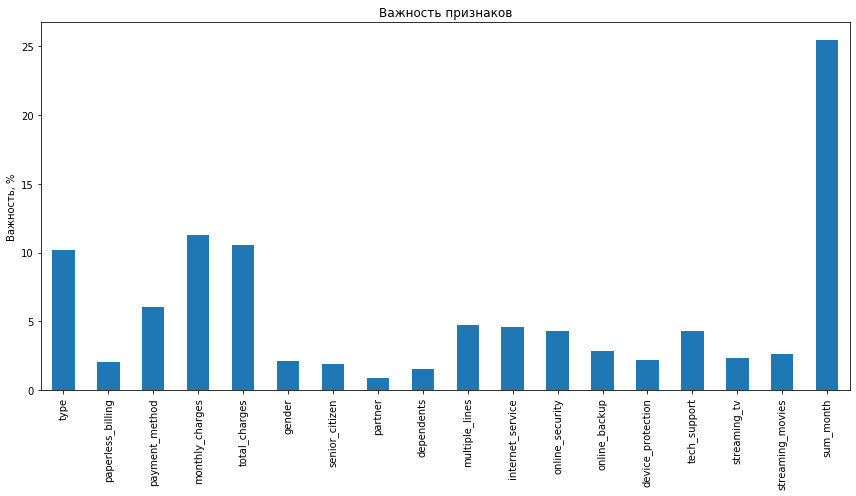

In [48]:
model_cat = CatBoostClassifier(eval_metric =  'AUC', random_seed =42, cat_features=cat_featur, verbose=False)
model_cat.fit(X = features_train_cat,  y = target_train_cat)

cat_iris_imp = pd.Series(model_cat.get_feature_importance(),
                         features_train_cat.columns)
fig, ax = plt.subplots(figsize=(12,7))
cat_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

Удалим из выборок признаки, которые являются наименее значимые с точки зрения модели CatBoostClassifier().

In [49]:
features_train_cat_new = features_train_cat.drop(['monthly_charges', 'device_protection', 'streaming_movies'], axis=1)
features_test_cat_new = features_test_cat.drop(['monthly_charges',  'device_protection', 'streaming_movies'], axis=1)

In [50]:
cat_featur_new = ['type', 'paperless_billing',  'partner','payment_method', 'gender',
       'senior_citizen',  'dependents', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'tech_support', 'streaming_tv']

In [51]:
accuracy_rfr_feat, f1_rfr_feat, roc_auc_rfr_feat, predictions_rfr_feat, probabilities_rfr_feat = model_math(RandomForestClassifier
                    (random_state = 12345, class_weight='balanced') ,  features_train_new, features_test_new, target_train, target_test)

In [52]:
accuracy_cbc_feat, f1_cbc_feat, roc_auc_cbc_feat,  predictions_cbc_feat, probabilities_cbc_feat = model_math(CatBoostClassifier
                    (eval_metric =  'AUC', random_seed =42, cat_features=cat_featur_new, verbose=False),  
                    features_train_cat_new, features_test_cat_new, target_train_cat, target_test_cat )

In [53]:
math_feat = pd.DataFrame({'Модель': ['RandomForestRegressor', 'CatBoostRegressor'],
                'accuracy':  [accuracy_rfr, accuracy_cbc], 
                ' f1': [f1_rfr, f1_cbc], 
                'roc_auc': [roc_auc_rfr, roc_auc_cbc],
                'accuracy_feat':  [accuracy_rfr_feat, accuracy_cbc_feat], 
                ' f1_feat': [f1_rfr_feat, f1_cbc_feat], 
                'roc_auc_feat': [roc_auc_rfr_feat, roc_auc_cbc_feat]})
math_feat

,Модель,accuracy,f1,roc_auc,accuracy_feat,f1_feat,roc_auc_feat
0,RandomForestRegressor,0.768301,0.643326,0.846616,0.783227,0.535769,0.786538
1,CatBoostRegressor,0.816631,0.616071,0.863682,0.817342,0.614693,0.866090


## Подбор гиперпараметров.
<a id="параметр"></a>

Напишем функцию для расчета гиперпараметров с помощью модели GridSearchCV() с кросс-валидацией

In [54]:
def grid_search(X, y, model, parameters):#функция для автоматического подбора параметров
    model_cv = GridSearchCV(model, parameters, cv=4,  scoring='roc_auc')#спомощью GridSearchCV подбираем параметры
    model_cv.fit(X, y)#обучаем модель
    return model_cv.best_params_

Подберем гиперпараметры для RandomForestClassifier(), для этого напишем словарь с параметрами, которые будем перебирать и искать среди них наилучшие. Целевой признак имеет дисбаланс, сбалансируем его добавив в параметры class_weight = balanced

In [55]:
rfc_param = { 'n_estimators': range (10, 51, 10),#n_estimators – число деревьев в лесу. Оно будет изменяться от 10 до 50 с шагом 10
              'max_depth': range (1,13, 2),#max_depth – глубина дерева. Она будет изменяться от 1 до 12 с шагом в 2
              'min_samples_leaf': range (1,6),#min_samples_leaf – минимальное число образцов в листах. Оно будет изменяться от 1 до 7
              'min_samples_split': range (2,8,2),#min_samples_leaf – минимальное число образцов для сплита. Оно будет изменяться от 2 до 9.
               'class_weight' : ['balanced'] }

In [56]:
grid_search(features_train_new, target_train, RandomForestClassifier(), rfc_param)

{'class_weight': 'balanced',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

Подберем гиперпараметры для CatBoostClassifier(), напишем словарь с параметрами, которые будем перебирать и искать среди них наилучшие.

In [57]:
cbc_param = {'depth'         : [2, 3, 4],
                 'learning_rate' : [0.05, 0.1, 0.5, 0.9],
                  'iterations'    : [10, 100, 200, 300, 400],
                'eval_metric' :['AUC'],
                'verbose' : [False],
                'cat_features' : [cat_featur_new]}

Для оценки был выбран AUC, потому что данные сильно несбалансированы, и этот показатель вполне подходит для таких случаев, так как несбалансированность на него не влияет.

In [58]:
grid_search(features_train_cat_new, target_train_cat, CatBoostClassifier(), cbc_param)

{'cat_features': ['type',
  'paperless_billing',
  'partner',
  'payment_method',
  'gender',
  'senior_citizen',
  'dependents',
  'multiple_lines',
  'internet_service',
  'online_security',
  'online_backup',
  'tech_support',
  'streaming_tv'],
 'depth': 3,
 'eval_metric': 'AUC',
 'iterations': 400,
 'learning_rate': 0.1,
 'verbose': False}

## Выбор и тестирование финальной модели
<a id="тест"></a>

In [59]:
accuracy_test_rfr, f1_test_rfr, roc_auc_test_rfr, predictions_test_rfr, probabilities_test_rfr = model_math(RandomForestClassifier(random_state = 12345, max_depth = 7, min_samples_leaf = 1,
                min_samples_split = 6, n_estimators = 50, class_weight='balanced') ,  features_train_new, features_test_new, target_train, target_test)

In [60]:
accuracy_test_cbc, f1_test_cbc, roc_auc_test_cbc,  predictions_test_cbc, probabilities_test_cbc = model_math(CatBoostClassifier(iterations=400, depth=2, learning_rate=0.1, loss_function='Logloss',
         eval_metric =  'AUC', random_seed =42, cat_features=cat_featur_new, verbose=False),  features_train_cat_new, features_test_cat_new, target_train_cat, target_test_cat )

In [61]:
final_math = pd.DataFrame({'Модель': ['RandomForestRegressor', 'CatBoostRegressor'],
                'accuracy_feat':  [accuracy_rfr_feat, accuracy_cbc_feat], 
                ' f1_feat': [f1_rfr_feat, f1_cbc_feat], 
                'roc_auc_feat': [roc_auc_rfr_feat, roc_auc_cbc_feat],           
                'accuracy_final':  [accuracy_test_rfr, accuracy_test_cbc], 
                ' f1_final': [f1_test_rfr, f1_test_cbc], 
                'roc_auc_final': [roc_auc_test_rfr, roc_auc_test_cbc]})
final_math

,Модель,accuracy_feat,f1_feat,roc_auc_feat,accuracy_final,f1_final,roc_auc_final
0,RandomForestRegressor,0.783227,0.535769,0.786538,0.746979,0.622081,0.842854
1,CatBoostRegressor,0.817342,0.614693,0.866090,0.819474,0.609231,0.870673


Визуализируем ROC кривую для лучшей модели CatBoostRegressor.

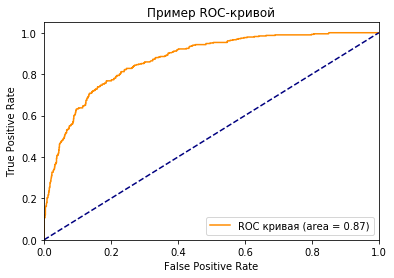

In [62]:
fpr, tpr, treshold = roc_curve(target_test_cat , probabilities_test_cbc [:,1])# рассчитываем roc-кривую
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

Построим матрицу путаницы.

Text(0.5, 1, 'Матрица путаницы')

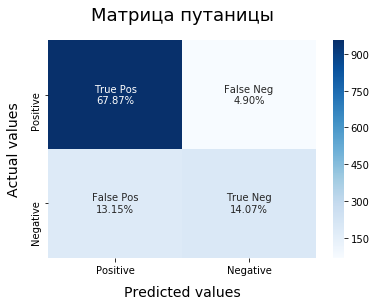

In [63]:
cf_matrix = confusion_matrix(target_test_cat, predictions_test_cbc)
categories  = ['Positive','Negative']
group_names = ['True Pos',  'False Neg', 'False Pos', 'True Neg']

group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Матрица путаницы", fontdict = {'size':18}, pad = 20)

## Вывод
<a id="вывод"></a>

Всего на рассмотрение было предоставлено 4 датафрейма:
*	Таблица df_contr (информация о договоре)
*	Таблица df_pers (персональные данные клиента)
*	Таблица df_int (информация об интернет-услугах)
*   Таблица df_ph (информация об услугах телефонии)

Для выполнения поставленной задачи были проделаны следующие этапы:
* загружен и изучен датасет: пропущенные значения и дубликаты не выявлены, выбросы отсутствуют, удалены 11 записей пользователей заключивших контракт в день выгрузки датасета;
* произведена предобработка данных: заменены типы данных, переименованы столбцы, добавлен новый признак - длительность пользования услугами оператора; 
* проведен исследовательский анализ данных, который показал, что отток клиентов происходит первые два месяца, после чего количество уходов резко снижается. При этом клиента, который ушел от оператора связи, можно охарактиризовать следующим образом:

 |   Тип услуги      |       Показатель       |
 | ------------------ |------------|
 |   Type      |Month-to-month |
   |   PaperlessBilling      |Yes |
 |   PaymentMethod      |Electronic chek |
 |   Partner      | No |
  |   Dependents      | No|
   |   InternetService      |Fiber optic |
 |   OnlineSecurity      | No |
 |   OnlineBackup      | No |
  |   DeviceProtection      | No |
 |   TechSupport      | No |
  |   StreamingTV      | No |
 |   StreamingMovies      | No |
 
Выявлена положительная корреляция между длительностью подписания контракта и суммарной выручкой. Также можно добавить, что чем дольше пользователь пользуется услугами и чем меньше он тратит в первые месяцы, тем дольше он будет оставаться  в качестве клиента. Длительные варианты оплаты способствуют удержанию клиента, а именно One year и Two year.

Выявлен дисбаланс классов.

|   Остался    |       Ушел       |
 | ------------------ |------------|
 |   5174      |1869 |
 
 Целевой признак - отток.     
 
 Для выбора модели были проделаны следующие шаги:
* проведено разбиение данных на обучающую и тестовую выборку;
* выявленный дисбаланс классов компенсирован при построение модели аргументом - class_weight='balanced';
* подобраны гиперпараметры спомощью GridSearchCV для рассматриваемых моделей: RandomForestClassifier и CatBoostClassifier.
* построен график ROC-кривой для модели CatBoostClassifier
* построена матрица путаницы для модели CatBoostClassifier.

|   Модель       |       roc_auc_final        |   
 | ------------------ |------------|
 |    	RandomForestClassifier     |   0.844887 | 
 |      CatBoostClassifier	   |   0.870673 | 
 
 Модель CatBoostClassifier характеризуется 
 
 |   Модель       |      accuracy   | recall     |      precision   | 
 | ------------------ |------------|------------|------------|
 |    	CatBoostClassifier     |  81.95   | 93.27 |  83.76 | 
 
Таким образом модель CatBoostClassifier обладает хорошей точностью (ошибается в 18%), высоким recall, модель корректно предсказывает Positive выборок  в  93% случаев, а также в 84% успешно классификацирует как Positive, так и Negative объекты.

В отчёте ответьте на вопросы:

Какие пункты плана были выполнены, а какие — нет (поясните почему)? Все пункты были выполнены.

Какие трудности возникли и как вы их преодолели? Особых трудностей не было. Все решается спомощью яндекс. В интернете огромное количество информации. Главная трудность не потонуть в ней и найти нужное в короткие сроки) 

Какие ключевые шаги в решении задачи выделили? 1. Анализ поставленной с задачей. 2. Знакомство с данными. 3. Предобработка данных. 4. Исследовательский анализ. 5. Подготовка данных к работе с моделями. 6. Выбор моделей для данной задачи. 7. Подбор гиперпараметров. 8. Тестирование модели.

Какая ваша итоговая модель и какое у неё качество?Модель - CatBoostClassifier,  roc_auc_final  = 0.870673

## Чек-лист
<a id="лист"></a>

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики * roc_auc* не меньше 0.75
- [x]  Выводы написаны